In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import functions as funs
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 150)

In [12]:
#Reading in labeled content
labeled_content = pd.read_pickle('data/labeled_content_new.pkl')
labeled_content = pd.DataFrame(labeled_content)


In [13]:
X = pd.DataFrame(labeled_content['content'].apply(lambda x: funs.word_count(x, 'fact')))
y = labeled_content['type'].apply(lambda x: funs.bin_target(x))

In [14]:
#Splitting data into train, validation and test sets
X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size=0.5,random_state=0,shuffle=True)

In [15]:
#baseline2: logistic regression, "fact"-mentions in each document
baseline_factcount = LogisticRegression()
baseline_factcount.fit(X_train, y_train)

y_pred = baseline_factcount.predict(X_val)

acc_factcount = accuracy_score(y_val, y_pred)

print(acc_factcount)

0.6211617073866337


evaluating Baseline with fact-count feature
accuracy: 0.6222401787199657
f1: 0.43181411974977657
Precision: 0.7707030751563098
Recall: 0.29993047969013803


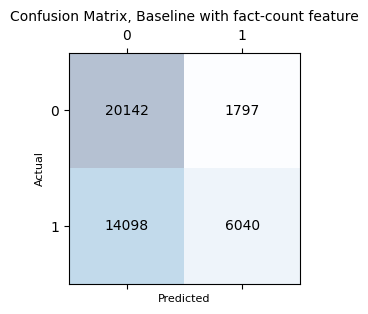

In [16]:
funs.evaluate_and_plot(baseline_factcount, 'Baseline with fact-count feature', X_test, y_test)

In [22]:
#Reading in LIAR
liar = pd.read_pickle('data/labeled_liar_statements_preprocessed.pkl')
liar = pd.DataFrame(liar)

#Renaming for consistency with training data column names
liar = liar.rename(columns={"Label": "type", "Statement": "content"})

In [23]:
true = set(["half-true", "mostly-true", "barely-true", "true"])
false = set(["false", "pants-fire"])

def get_bin_y_liar(x):
    if x in true:
        return 0
    if x in false:
        return 1

#Transforming true ('reliable' labels) into 0 and false ('fake' labels) into 1
liar["type"] = liar["type"].apply(lambda x: get_bin_y_liar(x))

In [24]:
X_test = pd.DataFrame(liar["content"].apply(lambda x: funs.word_count(x, 'fact'))) #Feature
y_test = liar["type"] #target

evaluating Baseline_factcount, LIAR-test
accuracy: 0.7191775467125322
f1: 0.008830022075055188
Precision: 0.22857142857142856
Recall: 0.004501969611705121


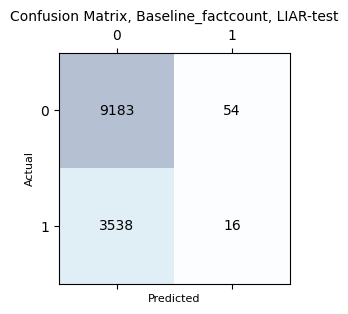

In [25]:
funs.evaluate_and_plot(baseline_factcount, 'Baseline_factcount, LIAR-test', X_test, y_test)

In [ ]:
labeled_content_extd = pd.read_pickle('data/labeled_content_extended_new.pkl')
labeled_content_extd = pd.DataFrame(labeled_content_extd)

In [ ]:
#Splitting into feature and target
X = pd.DataFrame(labeled_content_extd['content'].apply(lambda x: funs.word_count(x, 'fact')))
y = labeled_content_extd['type'].apply(lambda x: funs.bin_target(x))

In [ ]:
#Split data into 80% training, 10% validation and 10% test
X_train_extd, X_test_extd, y_train_extd, y_test_extd = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
X_val_extd, X_test_extd, y_val_extd, y_test_extd = train_test_split(X_test_extd, y_test_extd, test_size=0.5, random_state=0, shuffle=True)

In [ ]:
#baseline_factcount_extended: logistic regression, "fact"-mentions in each document with extended data
baseline_factcount_extd = LogisticRegression()
baseline_factcount_extd.fit(X_train_extd, y_train_extd)

y_pred_extended = baseline_factcount.predict(X_val_extd)

acc_factcount_extended = accuracy_score(y_val_extd, y_pred_extended)

print(acc_factcount_extended)

0.6221866842266174
